In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the sales.csv data set into a Pandas dataframe

time_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/sales.csv',sep=';')

In [3]:
#Convert the SalesDate field to a datetime data type

time_df['SalesDate'] = pd.to_datetime(time_df['SalesDate'])

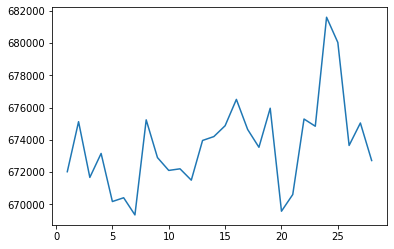

In [4]:
#Create a line chart showing the number of total units sold per day in February

time_df['Month'] = time_df['SalesDate'].dt.month
time_df['Day'] = time_df['SalesDate'].dt.day
new_df = time_df[time_df['Month'] == 2.0]
t_df = new_df.groupby('Day').sum()
plt.plot(t_df.index, t_df['Quantity'])

In [5]:
#Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449
def linechart(time_df,x,length=8,width=15,title=''):
    if time_df.index.name != x:
        time_df = time_df.set_index(x)
        
    ax = df.plot(figsize=(width,length), cmap='Set2')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5,-0.1),
             fancybox=True,shadow=True,ncol=4)
    plt.title(title + '\n', fontsize=20)

df3 = time_df.loc[(time_df['ProductID'] == 124) | (time_df['ProductID'] == 344)| (time_df['ProductID'] == 407)| (time_df['ProductID'] == 449)]
df3 = df3[df3['Month'] == 3.0]
df3 = df3[['ProductID','Quantity','Day']]
df3.head(5)

,ProductID,Quantity,Day
31,124,13,4.0
98,124,24,24.0
232,407,16,1.0
696,124,25,9.0
1677,449,5,9.0


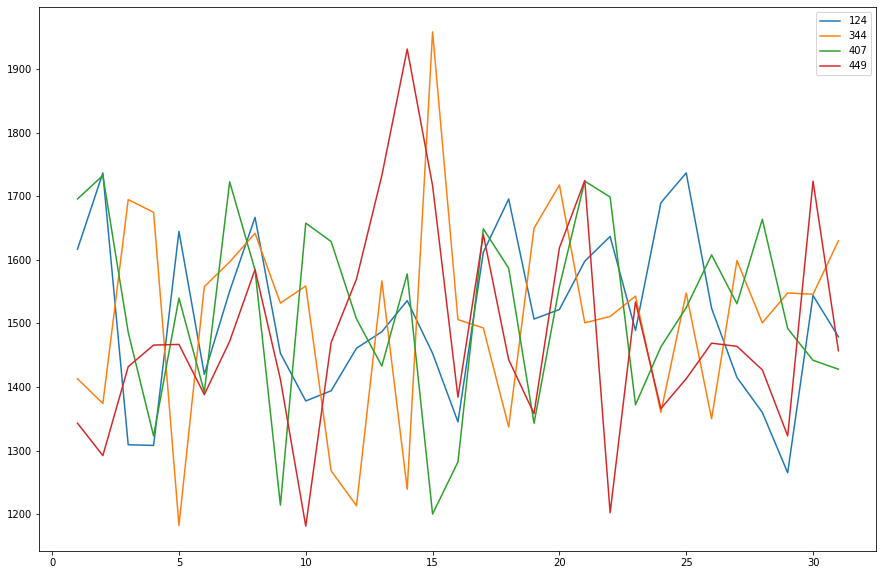

In [6]:
plt.figure(figsize=(15,10))
plt.plot(range(1,32), df3[df3['ProductID']==124].groupby('Day').sum()['Quantity'],label='124')
plt.plot(range(1,32), df3[df3['ProductID']==344].groupby('Day').sum()['Quantity'],label='344')
plt.plot(range(1,32), df3[df3['ProductID']==407].groupby('Day').sum()['Quantity'],label='407')
plt.plot(range(1,32), df3[df3['ProductID']==449].groupby('Day').sum()['Quantity'],label='449')
plt.legend()

<BarContainer object of 24 artists>

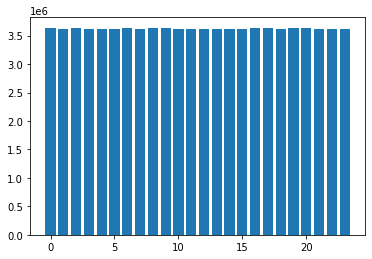

In [9]:
#Create a bar chart that shows units sold by each hour of the day

time_df['Hour'] = time_df['SalesDate'].dt.hour
n_df = time_df.groupby('Hour').sum()
plt.bar(x=n_df.index,height=n_df['Quantity'])

In [4]:
time_df['Month'] = time_df['SalesDate'].dt.strftime('%B')
time_df['Day'] = time_df['SalesDate'].dt.day
time_df['Hour'] = time_df['SalesDate'].dt.hour
time_df['Weekday'] = time_df['SalesDate'].dt.weekday
time_df['Date'] = time_df['SalesDate'].dt.date

In [5]:
#Create a heatmap that shows total unit sales by hour of the day and day of the week

df_pivot = time_df.pivot_table(index='Hour', columns='Weekday', values='Quantity', aggfunc='sum')


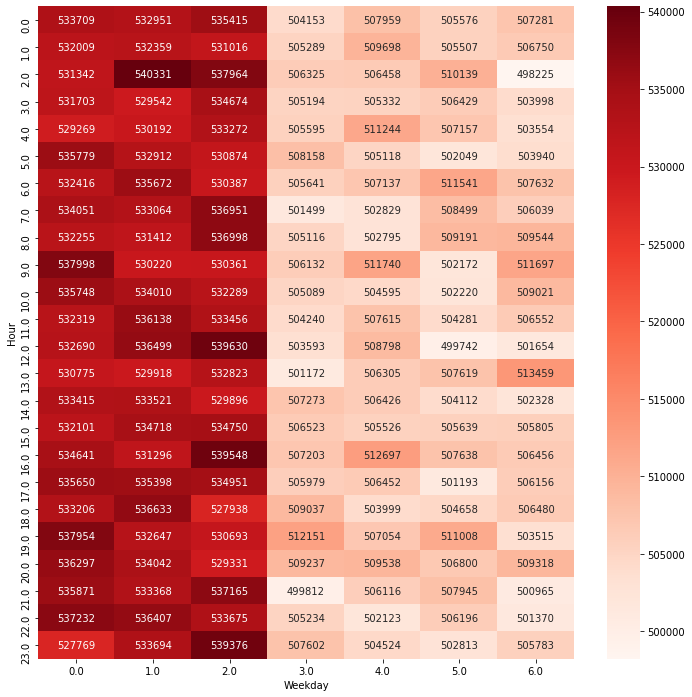

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Reds')
plt.show()

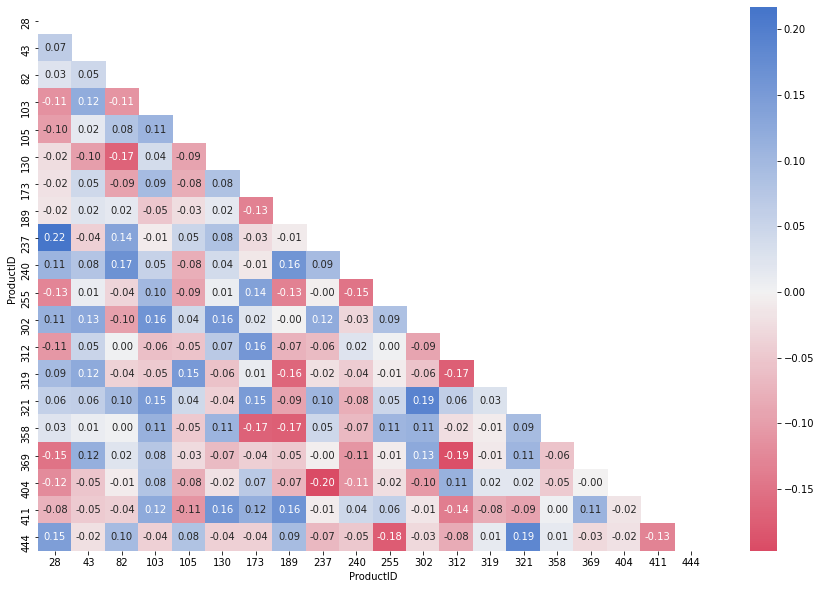

In [7]:
p_df = time_df.drop_duplicates(subset=['ProductID']).sample(20)['ProductID']

product_pivot = time_df.loc[time_df['ProductID'].isin(p_df)].pivot_table(index='Date', columns='ProductID', values='Quantity', aggfunc='sum')

corr = product_pivot.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(6,255, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, center=0, fmt='.2f')
plt.show()

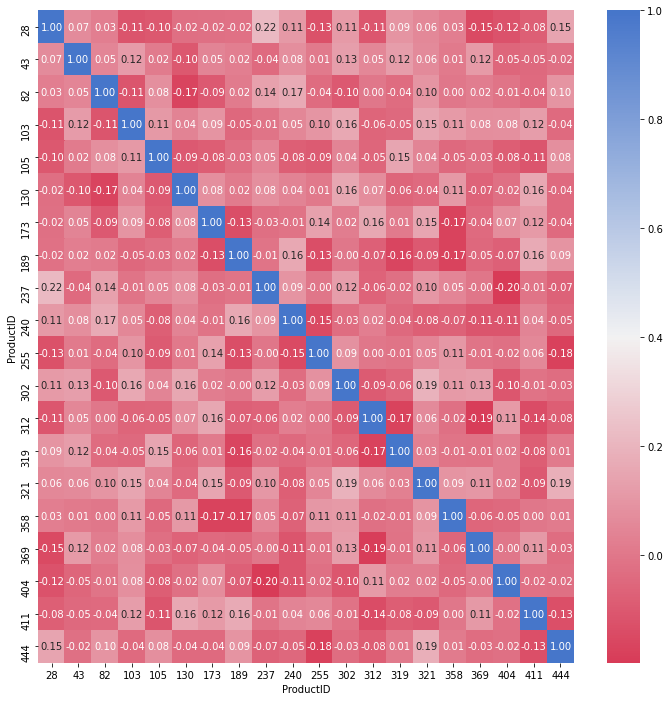

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(product_pivot.corr(), annot=True, fmt='.2f', cmap=cmap)
plt.show()

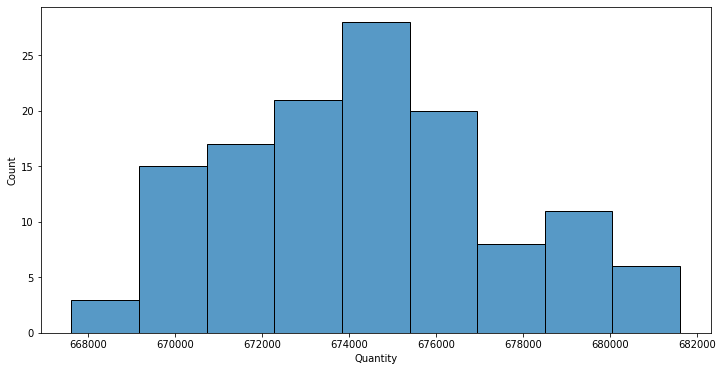

In [9]:
#Create a histogram showing the distribution of daily units sold

agg_date = time_df.groupby('Date').sum()['Quantity'].reset_index()

plt.figure(figsize=(12,6))
sns.histplot(agg_date['Quantity'])
plt.show()

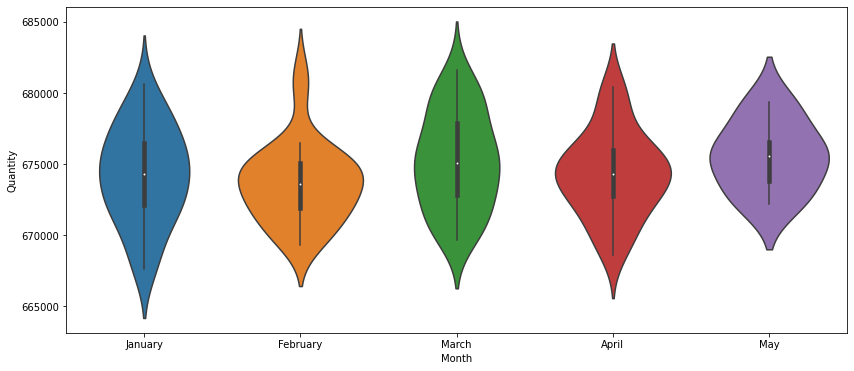

In [10]:
#Create a violin plot showing the distribution of daily units sold by month

agg_date = time_df.groupby(['Date','Month'], as_index=False).agg({'Quantity':'sum'})

plt.figure(figsize=(14,6))
sns.violinplot(data=agg_date, x='Month', y='Quantity')
plt.show()